# Option 1: Pyber

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
ride_data = pd.read_csv("ride_data.csv")
city_data = pd.read_csv("city_data.csv")

In [3]:
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


# City Type (Urban, Suburban, Rural)

In [5]:
city_type = city_data["type"]

In [6]:
city_ride_df = pd.merge(ride_data, city_data, how='outer', on='city', sort=True)
#city_ride_df

In [7]:
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Alvarezhaven,2016-04-18 20:51:29,31.93,4267015736324,21,Urban
1,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,21,Urban
2,Alvarezhaven,2016-09-01 22:57:12,18.09,1197329964911,21,Urban
3,Alvarezhaven,2016-08-18 07:12:06,20.74,357421158941,21,Urban
4,Alvarezhaven,2016-04-04 23:45:50,14.25,6431434271355,21,Urban


In [8]:
urban_df = city_ride_df[city_ride_df["type"]== "Urban"]
rural_df = city_ride_df[city_ride_df["type"]== "Rural"]
suburban_df = city_ride_df[city_ride_df["type"]== "Suburban"]

In [9]:
UrBavg = urban_df.groupby("city")["fare"].mean()
UrBct = urban_df.groupby("city")["fare"].count()
size = urban_df.groupby("driver_count").size()

In [10]:
RUavg = rural_df.groupby("city")["fare"].mean()
RUct = rural_df.groupby("city")["fare"].count()
RUsize = rural_df.groupby("driver_count").size()

In [11]:
SUavg = suburban_df.groupby("city")["fare"].mean()
SUct = suburban_df.groupby("city")["fare"].count()
SUsize = suburban_df.groupby("driver_count").size()


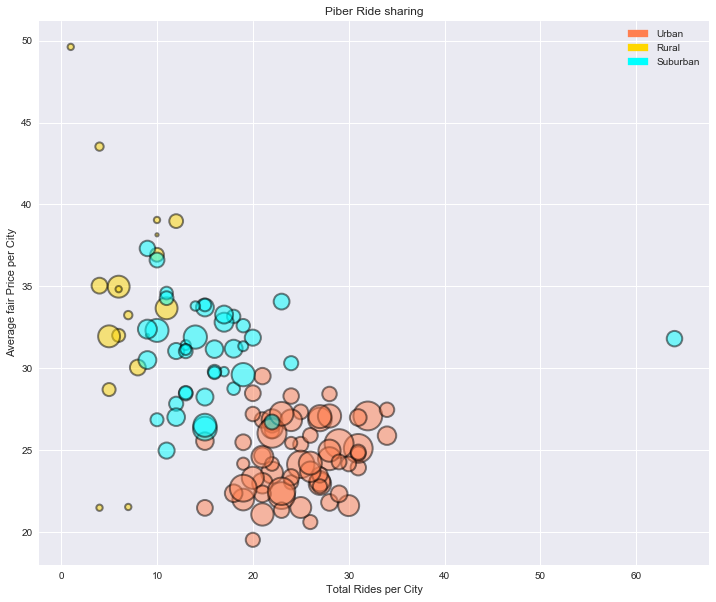

In [12]:
sns.set()
plt.figure(figsize=(12,10))

Ux = UrBct
Uy = UrBavg

Sx = SUct
Sy = SUavg

Rx = RUct
Ry = RUavg

blue_patch = mpatches.Patch(color = "cyan", label="Suburban")
yellow_patch = mpatches.Patch(color = "gold", label="Rural")
red_patch = mpatches.Patch(color='coral', label='Urban')
plt.legend(handles=[red_patch, yellow_patch, blue_patch])

plt.title("Piber Ride sharing")
plt.xlabel("Total Rides per City")
plt.ylabel("Average fair Price per City")
 
plt.scatter(Ux, Uy, color = "coral",s = size*10, cmap="Blues", alpha=0.5, edgecolors="black", linewidth=2)
plt.scatter(Rx, Ry, s = RUsize*10,color = "gold",cmap="Blues", alpha=0.5, edgecolors="black", linewidth=2)
plt.scatter(Sx, Sy, s = SUsize*10 ,color = "cyan",cmap="Blues", alpha=0.5, edgecolors="black", linewidth=2 )
plt.show()

# Pie Charts

# Percentage of Total Rides by City Type


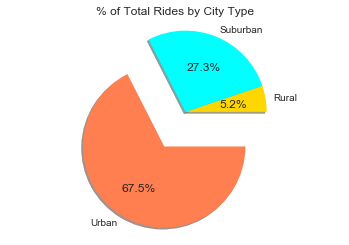

In [13]:
sns.set()
plt.title("% of Total Rides by City Type")
lables = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.5)
colors = ["gold", "cyan", "coral" ]
perecent_Fares = pd.DataFrame({"Perecentage":round(city_ride_df.groupby("type")["fare"].count()/len(city_ride_df["fare"])*100, 2)})
plt.pie(perecent_Fares, labels = lables, autopct = "%1.1f%%", shadow=True, explode = explode, colors = colors )
plt.axis("equal")

plt.show()

# Percentage of Total Fares by City Type

In [14]:
total_fare = pd.DataFrame({"Perecentage of Total Fares":round(city_ride_df.groupby("type")["fare"].sum()/sum(city_ride_df["fare"])*100, 2)})

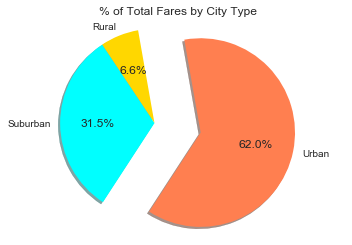

In [15]:
sns.set()
plt.title("% of Total Fares by City Type")

lables = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .5)
plt.pie(total_fare, colors = colors, autopct = "%1.1f%%",startangle = 100, labels = lables ,shadow = True, explode = explode)
plt.axis('equal')
plt.show()

# Perecentage of Total Drivers by City Type




In [16]:
total_drivers = round(city_ride_df.groupby("type")['driver_count'].sum()/sum(city_ride_df["driver_count"])*100, 2)

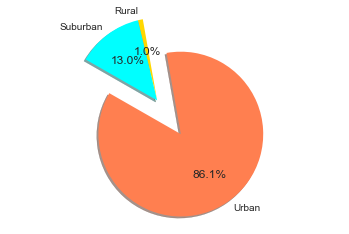

In [17]:
sns.set()
explode = (0,0,.5)
plt.pie(total_drivers, labels = lables, explode = explode, startangle = 100, shadow = True ,colors = colors, autopct = "%1.1f%%")
plt.axis("equal")
plt.show()